In [32]:
import numpy as np
import pandas as pd

from datetime import datetime
from scipy.stats import skew 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


['house_price_advanced_view.ipynb', 'submission.csv', 'house_price_advanced_models.ipynb', 'my_model_submission.csv1', 'my_model_submission4.csv', 'house_price', 'Day1.ipynb', 'titanic', 'house-prices-advanced-regression-techniques.zip', 'titanic.zip', 'my_model_submission3.csv', 'my_model_submission0.csv', 'Day2 Housing Price.ipynb', 'my_model_submission.csv', 'my_model_submission1.csv', 'house_price_view.ipynb', 'home-data-for-ml-course.zip', '.ipynb_checkpoints', 'home-data-for-ml-course', 'house_price.ipynb', 'my_model_submission2.csv']


In [33]:
train = pd.read_csv('house_price/dataset.csv')
test = pd.read_csv('house_price/test.csv')
print ("Data is loaded!")

Data is loaded!


In [34]:
print ("Train: ",train.shape[0],"sales, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

Train:  200000 sales, and  47 features
Test:  200000 sales, and  46 features


In [35]:
train.shape

(200000, 47)

In [36]:
train.head()

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,...,0,0,0,0,0,0,0,0,0,I
1,1,1999-01-15,313300,NaN,26,nochg,2025,47.6531,-122.1996,74,...,0,0,0,0,0,1,0,0,0,Q
2,2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,...,0,0,0,0,0,0,0,0,0,K
3,3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,...,0,0,0,0,0,0,0,0,0,G
4,4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,...,0,0,0,0,0,0,0,0,0,P


In [37]:
test.head()

,id,sale_date,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,200000,2022-12-15,4.0,,new,2025,47.4794,-122.2212,25,RENTON,...,0,0,0,0,0,0,0,0,0,J
1,200001,2000-10-15,2.0,,new,2025,47.5778,-122.0270,69,SAMMAMISH,...,0,0,0,0,0,0,0,0,0,O
2,200002,2004-06-15,1.0,,nochg,2025,47.5632,-122.1623,31,BELLEVUE,...,3,0,3,3,0,2,0,0,0,R
3,200003,2009-11-15,1.0,,nochg,2025,47.6911,-122.3469,6,SEATTLE,...,0,0,0,0,0,0,0,0,0,B
4,200004,1999-06-15,1.0,,reno - before,1999,47.4001,-122.4146,100,KING COUNTY,...,0,2,4,0,3,0,0,0,0,H


In [38]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('sale_price')
quantitative.remove('id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [39]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing

id                      0
sale_date               0
sale_price              0
sale_nbr            42182
sale_warning            0
join_status             0
join_year               0
latitude                0
longitude               0
area                    0
city                    0
zoning                  0
subdivision         17550
present_use             0
land_val                0
imp_val                 0
year_built              0
year_reno               0
sqft_lot                0
sqft                    0
sqft_1                  0
sqft_fbsmt              0
grade                   0
fbsmt_grade             0
condition               0
stories                 0
beds                    0
bath_full               0
bath_3qtr               0
bath_half               0
garb_sqft               0
gara_sqft               0
wfnt                    0
golf                    0
greenbelt               0
noise_traffic           0
view_rainier            0
view_olympics           0
view_cascade

In [40]:
missing = missing[missing > 0]
missing

sale_nbr       42182
subdivision    17550
submarket       1717
dtype: int64

<Axes: >

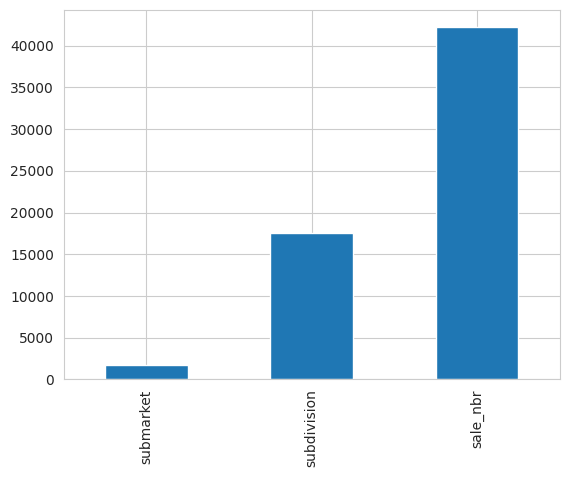

In [41]:
missing.sort_values(inplace=True)
missing.plot.bar()

<Axes: title={'center': 'Log Normal'}, xlabel='sale_price'>

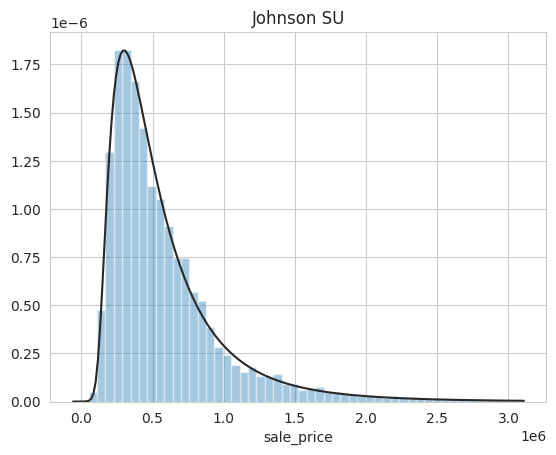

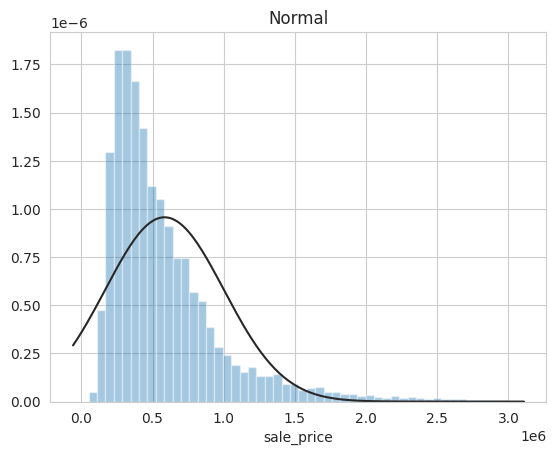

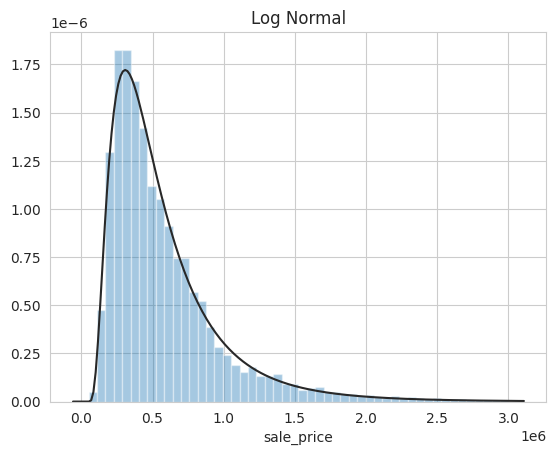

In [42]:
y = train['sale_price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [43]:
# shapiro-wilk test 正态性检验方法，常用，准确性高，适合小样本量
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


In [ ]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'sale_price']].groupby(feature).mean()['sale_price']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

In [ ]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

In [ ]:
plt.figure(1)
corr = train[quantitative+['sale_price']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = train[qual_encoded+['sale_price']].corr()
sns.heatmap(corr)
plt.figure(3)
# 设置空矩阵，用来存放相关系数值
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['sale_price'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['sale_price']:
    for q2 in qual_encoded+['sale_price']:
        # 将相关系数存在刚才的空矩阵指定位置，df.loc['row_label1', 'row_label2'] 
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr)

In [ ]:
import umap.umap_ as umap
features = quantitative + qual_encoded
X = train[features].fillna(0.).values
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42, n_jobs=-1)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
plt.title("UMAP 2D Projection")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()



In [ ]:
X_kmeans = KMeans(n_clusters=20, random_state=0)
X_kmeans.fit(X_umap)
fr = pd.DataFrame({'umap1': X_umap[:,0], 'umap2': X_umap[:, 1], 'cluster': X_kmeans.labels_})
sns.lmplot(data=fr, x='umap1', y='umap2', hue='cluster', fit_reg=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['sale_price'], kde=True)
plt.title("Price distrubution")
plt.show()

